# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 5. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**


* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

---


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 35 баллов за контест и 5 баллов за ноутбук
* Задача 2 &mdash; 20 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 40 баллов

In [ ]:
# Bot check

# HW_ID: fpmi_ad5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

import scipy.stats as sps

coin = sps.bernoulli(p=0.5).rvs
uniform_pdf = sps.uniform.pdf
norm_pdf = sps.norm.pdf
expon_pdf = sps.expon.pdf

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

Условие задачи в контесте, ссылка на который отправлена через бот.

Продублируйте сюда написанный код и постройте требуемые графики, которые при необходимости можно доработать.

Функция, которая генерирует случаные величины из нормального распределения с заданной точностью:

In [2]:
def uniform(size=1, precision=30):
    if isinstance(size, int):
        size = (size,)
    shape = size + (precision,)
    data = coin(shape)
    return np.sum(data * 2.0**np.arange(-precision, 0), axis=-1).reshape(size)

График, отражающий зависимость плотности от значения случайной величины для равномерного распределения:

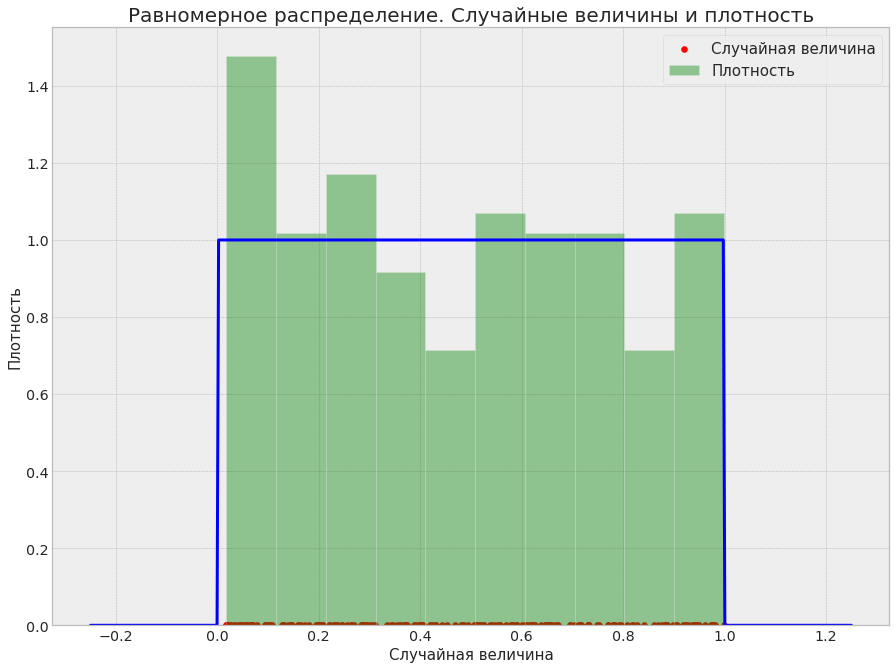

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [3]:
def plot_uniform_density(size=200):
    grid = np.linspace(start=-0.25, stop=1.25, num=500)
    data=uniform(size, precision=50)

    plt.figure(figsize=(15, 11))
    plt.style.use('bmh')
    plt.title('Равномерное распределение. Случайные величины и плотность', fontsize=20)
    plt.xlabel('Случайная величина', fontsize=15)
    plt.ylabel('Плотность', fontsize=15)

    plt.scatter(x=data, y=np.zeros(size), color='red', label='Случайная величина')

    plt.hist(x=data, bins=10, density=True, alpha=0.4, color='green',label='Плотность')

    plt.plot(grid, uniform_pdf(grid), linewidth=3.0, color='blue')

    plt.legend(prop={'size': 15})
    plt.show()
    return plt.gcf()
plot_uniform_density()

График, отражающий зависимость плотности от значения случайной величины для разных значений точности (все так же равномерное распределение):

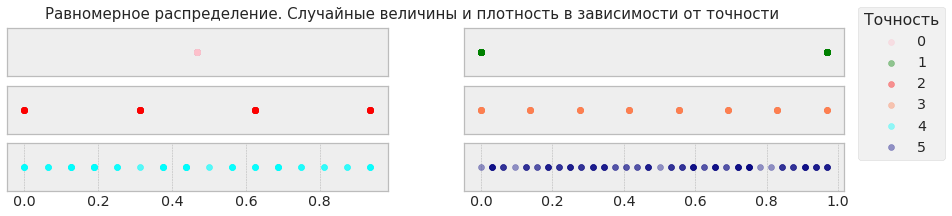

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
def plot_uniform_different_precision(size=100):
    fig = plt.figure(figsize=(15, 3))
    plt.style.use('bmh')

    colors = ['pink', 'green', 'red', 'coral', 'cyan', 'navy']

    for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
        plt.subplot(3, 2, i + 1)

        plt.scatter(uniform(size, i), np.zeros(size), alpha=0.4, color=colors[i], label='{}'.format(i))

        plt.yticks([])
        if i < 4:
            plt.xticks([])
    plt.suptitle('Равномерное распределение. Случайные величины и плотность в зависимости от точности', fontsize=15)
    fig.legend(title='Точность')
    plt.show()
    return plt.gcf()
plot_uniform_different_precision()

Генерация случайных величин нормального распределения с помощью преобразования Бокса-Мюллера:

In [4]:
def normal(size=1, loc=0, scale=1, precision=30):
    if isinstance(size, int):
        size = (size,)
    shape = size + (2,)
    u = np.random.uniform(size=shape)
    y1 = np.sqrt(-2*np.log(u[..., 0])) * np.cos(2*np.pi*u[..., 1])
    z = loc + scale * y1
    return np.round(z, precision).reshape(size)

График, отражающий зависимость плотности от значения случайной величины для нормального распределения:

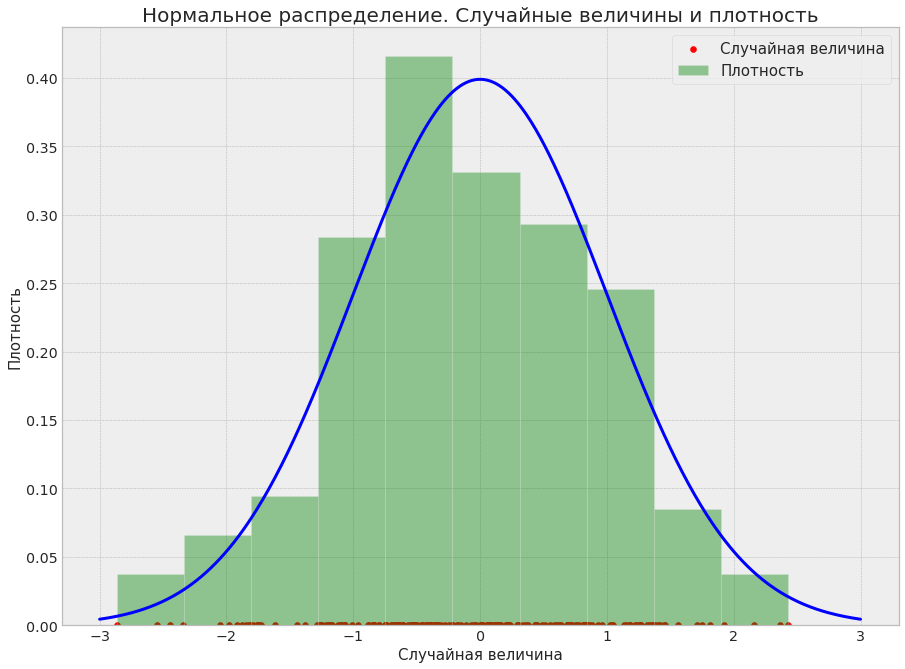

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [5]:
def plot_normal_density(size=200):
    grid = np.linspace(start=-3, stop=3, num=500)
    data = normal(size)

    fig = plt.figure(figsize=(15, 11))

    plt.scatter(x=data, y=np.zeros(size), color='red', label='Случайная величина')

    plt.hist(x=data, bins=10, density=True, alpha=0.4, color='green',label='Плотность')

    plt.plot(grid, norm_pdf(grid), linewidth=3.0, color='blue')

    plt.title('Нормальное распределение. Случайные величины и плотность', fontsize=20)
    plt.xlabel('Случайная величина', fontsize=15)
    plt.ylabel('Плотность', fontsize=15)
    plt.legend(prop={'size': 15})
    plt.show()
    return plt.gcf()
plot_normal_density()

Для решения задачи о генерации экспоненциального распределения воспользуемся следующим фактом: экспоненциальное распределения может быть получено из непрерывного равномерного распределения методом обратного преобразования. Найдем обратную функцию для $F(x) = 1 - e^{-\lambda x}$

$F^{-1}(x)=\frac{-1}{\lambda}\ln(1-x)$

In [6]:
def expon(size=1, lambd=1, precision=30):
    return -np.log(uniform(size, precision)) / lambd

График, отражающий зависимость плотности от значения случайной величины для экспоненциального распределения:

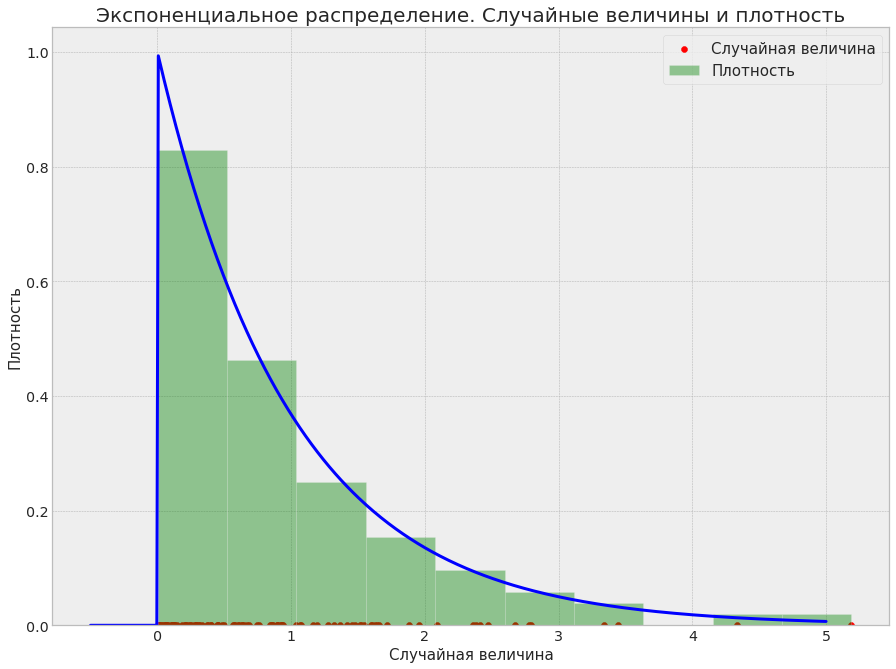

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [7]:
def plot_expon_density(size=100):
    grid = np.linspace(start=-0.5, stop=5, num=500)
    data = expon(size)
    fig = plt.figure(figsize=(15, 11))

    plt.scatter(x=data, y=np.zeros(size), color='red', label='Случайная величина')

    plt.hist(x=data, bins=10, density=True, alpha=0.4, color='green',label='Плотность')

    plt.plot(grid, expon_pdf(grid), linewidth=3.0, color='blue')

    plt.title('Экспоненциальное распределение. Случайные величины и плотность', fontsize=20)
    plt.xlabel('Случайная величина', fontsize=15)
    plt.ylabel('Плотность', fontsize=15)
    plt.legend(prop={'size': 15})
    plt.show()
    return plt.gcf()
plot_expon_density()

**Выводы:**

В результате выполнения задачи, мы получили абсолютно непрерывные распределения, используя дискретное распределение Бернулли. В первой части задания мы изучили влияние точности представления действительных чисел на генерируемые величины. Это важно учитывать при работе с числами в реальных исследованиях.

Во второй и третьей частях мы использовали теорию вероятности для генерации распределений. Мы пользовались преобразованием Бокса-Мюллера и методом обратных преобразований для получения новых распределений на основе известных функций распределения.



---

### Задача 2.

Рассмотрим распределение Коши с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими тяжелыми хвостами. Иначе говоря, плотность убывает медленно при $x \to \infty$. Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

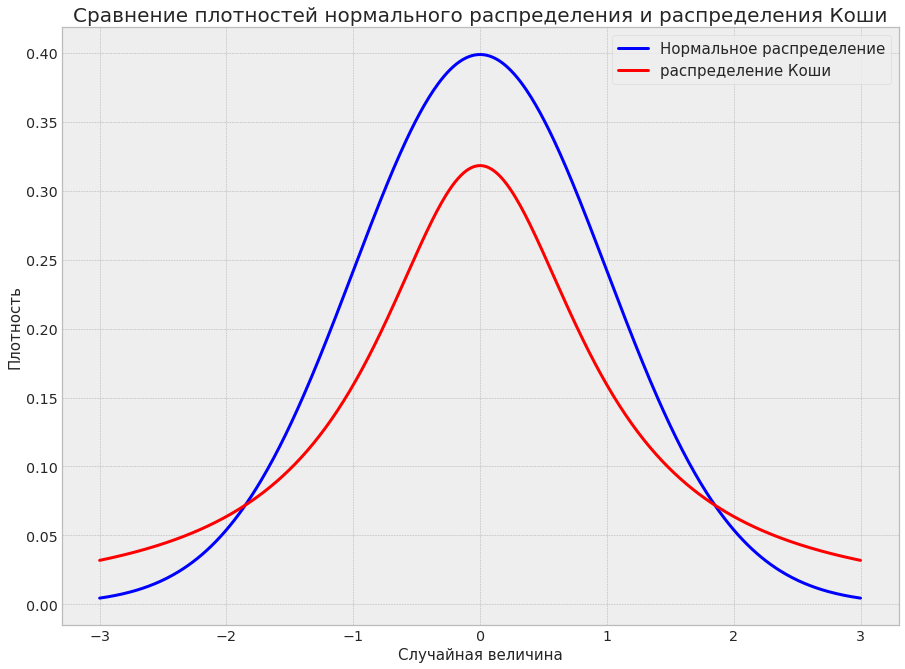

In [8]:
grid = np.linspace(start=-3, stop=3, num=500)
data = normal(200)
fig = plt.figure(figsize=(15, 11))

plt.plot(grid, sps.norm.pdf(grid), linewidth=3.0, color='blue', label='Нормальное распределение')

plt.plot(grid, sps.cauchy.pdf(grid), linewidth=3.0, color='red', label='распределение Коши')
plt.title('Сравнение плотностей нормального распределения и распределения Коши', fontsize=20)
plt.xlabel('Случайная величина', fontsize=15)
plt.ylabel('Плотность', fontsize=15)
plt.legend(prop={'size': 15})

**2.** Повторите эксперимент с <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

Рассмотрим распределение Коши:

In [ ]:
size = 1000  # количество случайных величин
samples = sps.cauchy.rvs(size=size)
cum_means = samples.cumsum() / (np.arange(size) + 1)

Построим график:

(0.0, 1000.0)

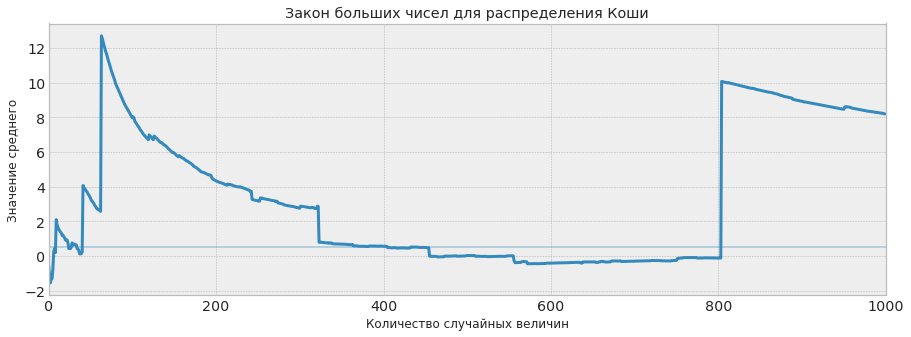

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(cum_means, lw=3)
plt.hlines(0.5, 0, size, alpha=0.3)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.title('Закон больших чисел для распределения Коши')
plt.xlim((0, size))

Повторим эксперимент 10 раз независимо:

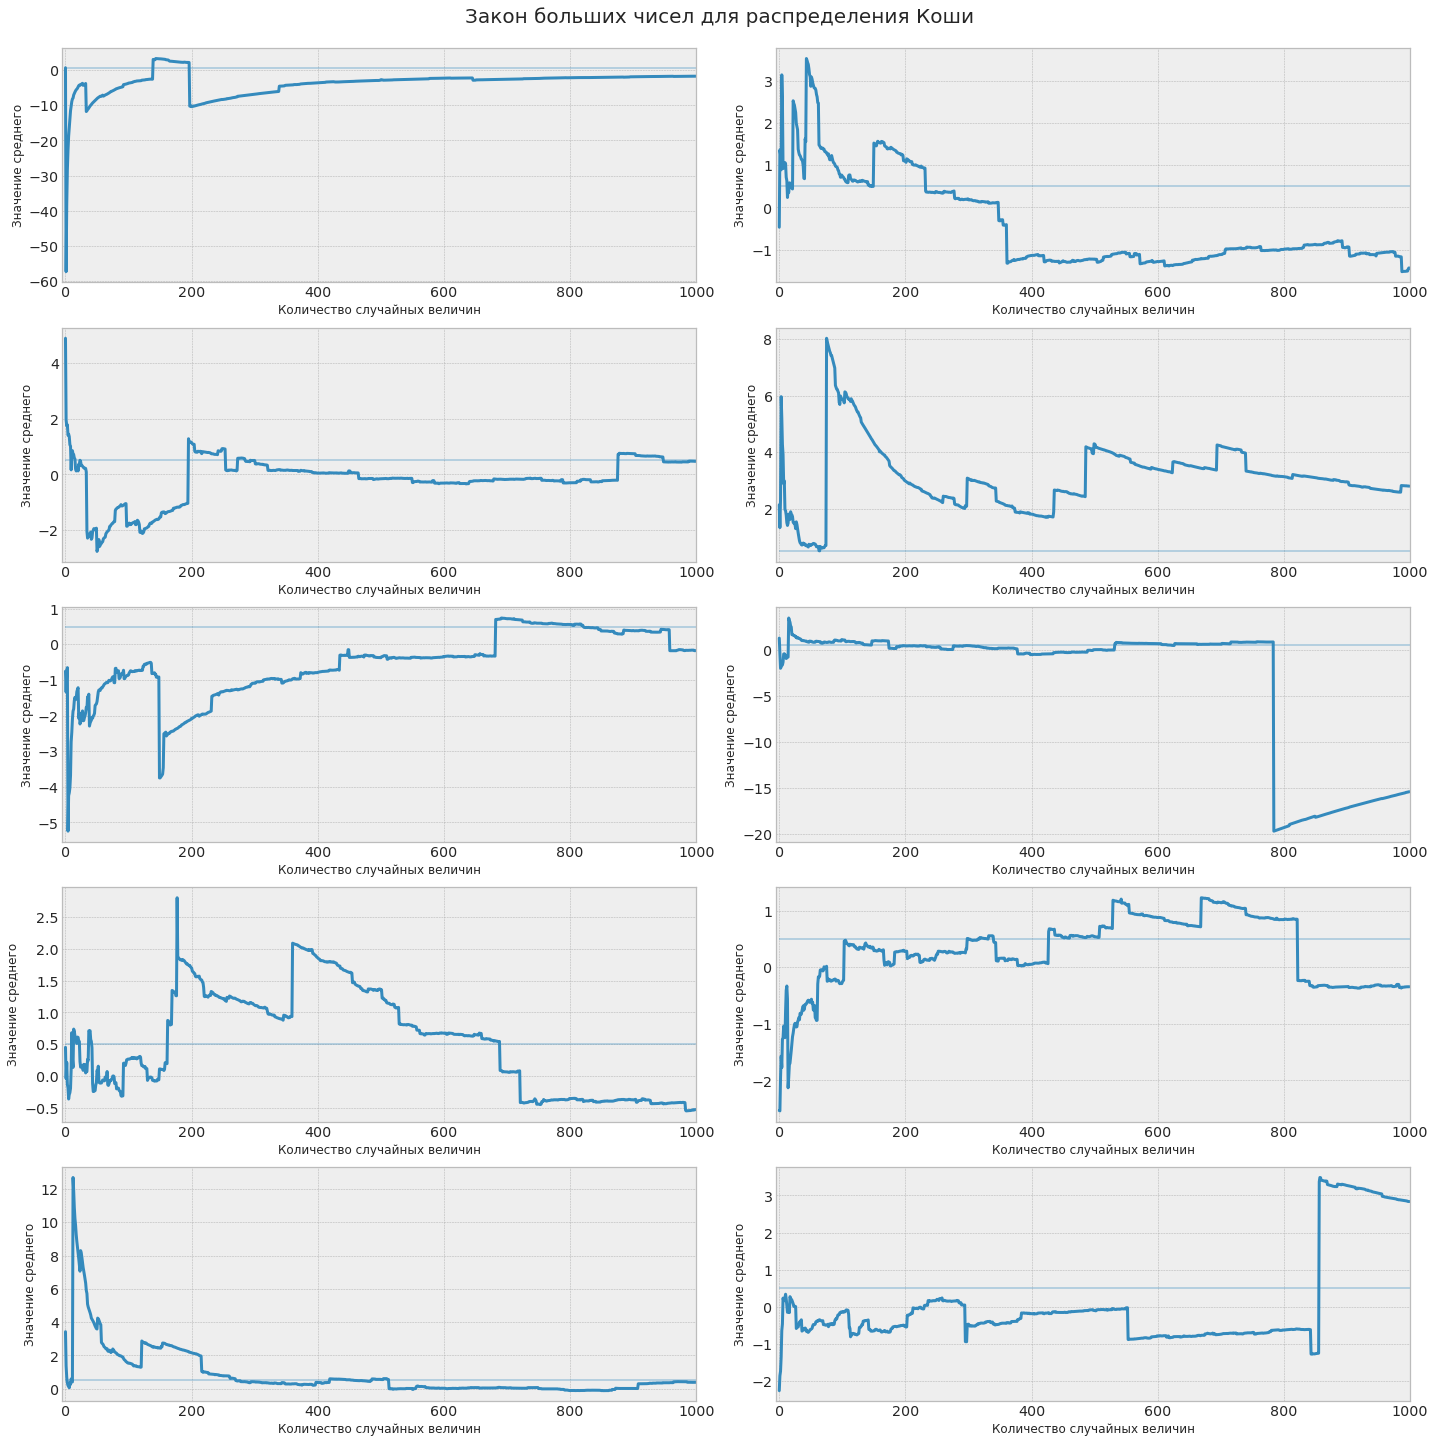

In [ ]:
plt.figure(figsize=(20, 20))

# эксперименты
for i in range(10):

    # Генерация выборки и вычисление средних
    samples = sps.cauchy.rvs(size=size)
    cum_means = samples.cumsum() / (np.arange(size) + 1)
    
    # График
    plt.subplot(5, 2, i+1)
    plt.plot(cum_means, lw=3)
    plt.hlines(0.5, 0, size, alpha=0.3)
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение среднего')
    plt.xlim((-5, size))
    
plt.suptitle('Закон больших чисел для распределения Коши', fontsize=20, y=1)
plt.tight_layout()

Сгенерируем больше случайных величин:

In [ ]:
size = 1000  # количество случайных величин
samples_count = 500  # количество выборок

samples = sps.cauchy.rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

Визуализируем их все на одном графике:

(0.0, 1000.0)

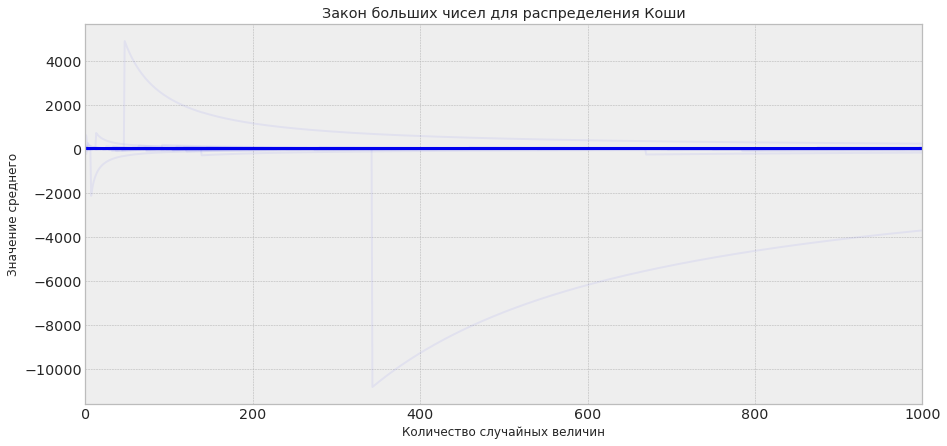

In [ ]:
plt.figure(figsize=(15, 7))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color='blue', alpha=0.05)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.title('Закон больших чисел для распределения Коши')
plt.xlim((0, size))

Ответ на вопрос:
*   Распределение Коши не имеет математического ожидания и дисперсии
*   ЗБЧ говорит о том, что среднее арифметическое конечной выборки близко к математическому ожиданию этого распределения
Можно сделать вывод, что ЗБЧ не применим для распределения Коши, графики - отличный способ продемонстрировать непредсказуемость его применения.

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

Сгенерируем выборку распределения Коши:

In [ ]:
size = 1000  # количество случайных величин
samples = sps.cauchy.rvs(size=size)
cum_means = [np.median(samples[:i + 1]) for i in range(len(samples))]

Построим график, где красным будет оторбражено математическое ожидание выборочной медианы:



(0.0, 1000.0)

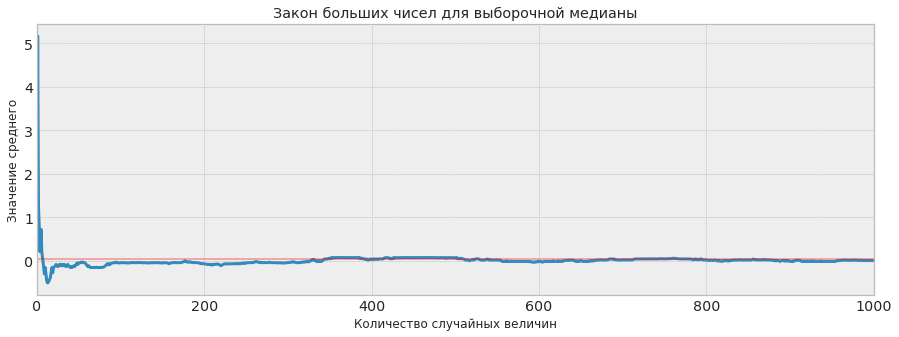

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(cum_means, lw=3)
plt.hlines(np.var(cum_means, ddof=1), 0, size, alpha=0.3, color='red')
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.title('Закон больших чисел для выборочной медианы')
plt.xlim((0, size))

Повторим эксперимент 10 раз независимо:

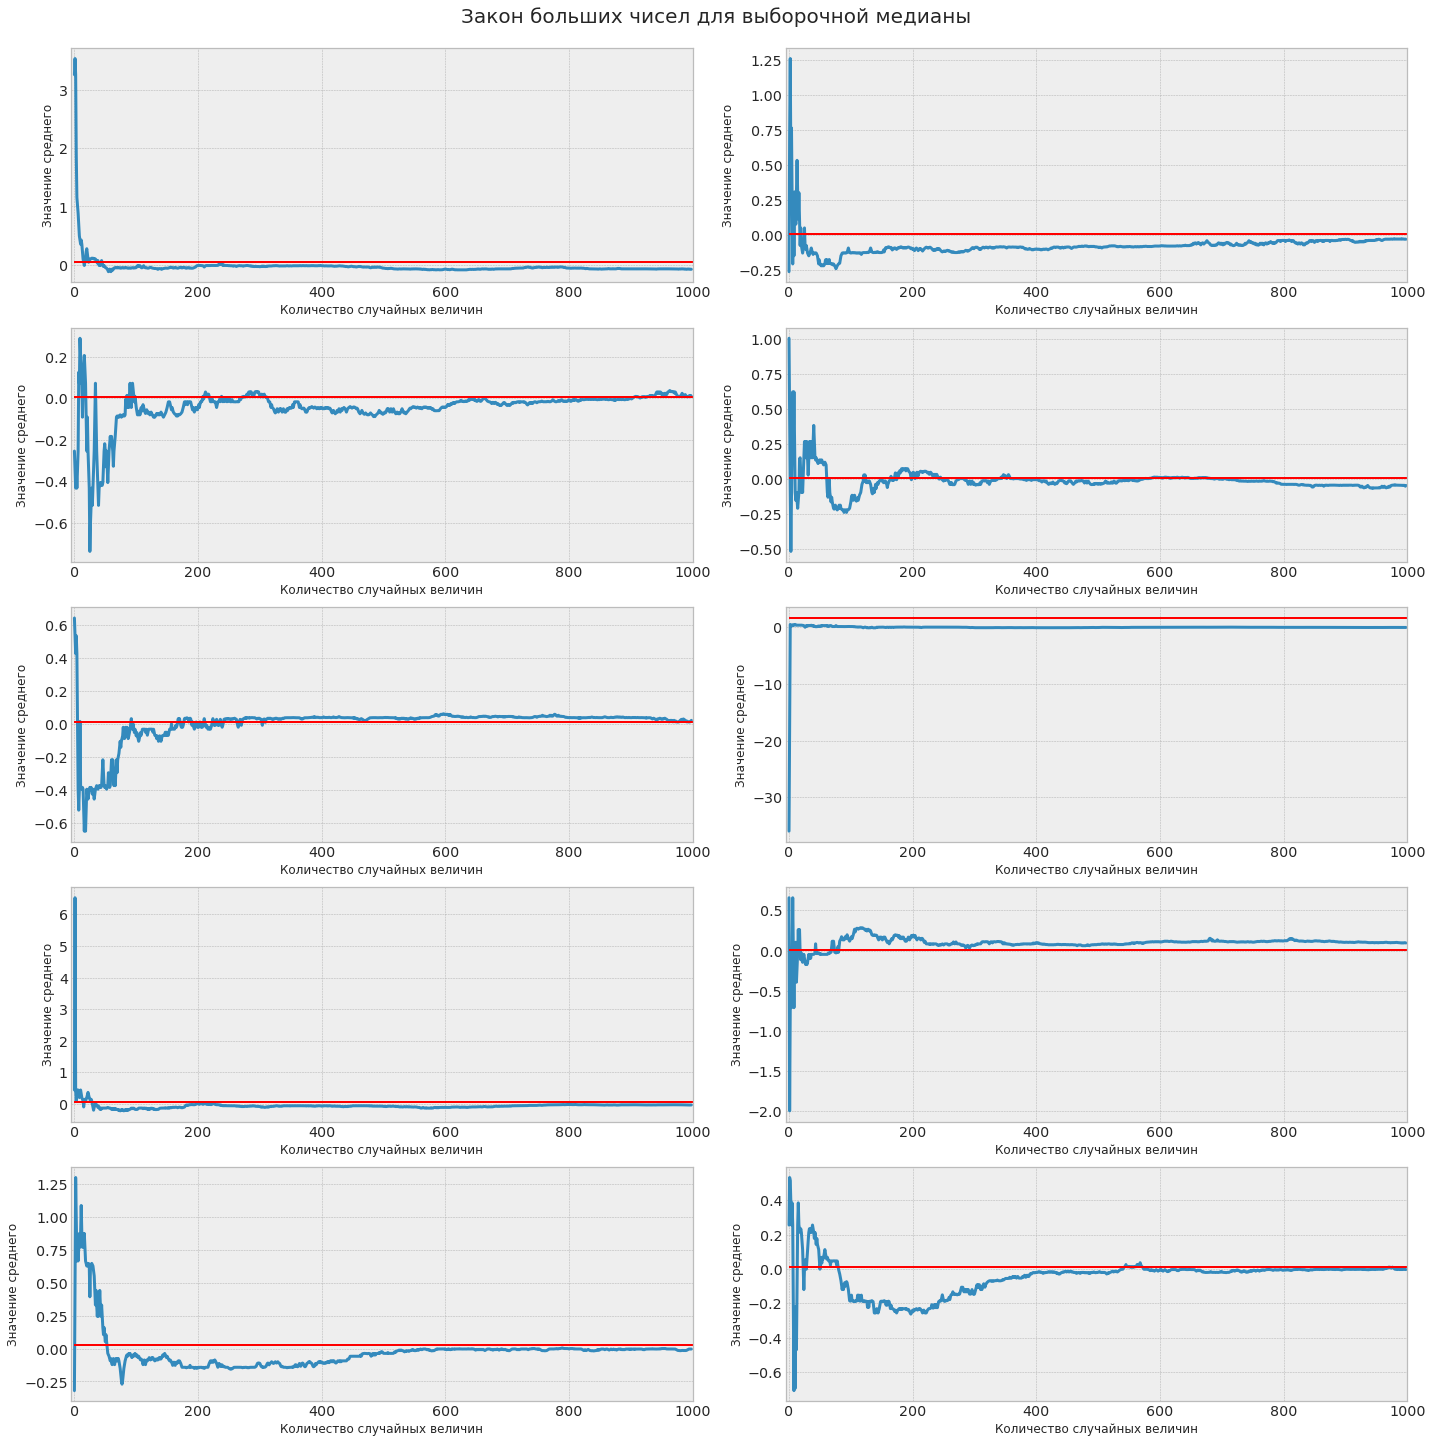

In [ ]:
plt.figure(figsize=(20, 20))

# эксперименты
for i in range(10):

    # Генерация выборки и вычисление средних
    samples = sps.cauchy.rvs(size=size)
    cum_means = [np.median(samples[:i + 1]) for i in range(len(samples) -1)]
    
    # График
    plt.subplot(5, 2, i+1)
    plt.plot(cum_means, lw=3)
    plt.hlines(np.var(cum_means, ddof=1), 0, size, alpha=1, color='red')
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение среднего')
    plt.xlim((-5, size))
    
plt.suptitle('Закон больших чисел для выборочной медианы', fontsize=20, y=1)
plt.tight_layout()

Сгенерируем больше случайных величин:

In [ ]:
size = 1000  # количество случайных величин
samples_count = 500  # количество выборок

samples = sps.cauchy.rvs(size=(samples_count, size))
cum_means = []
for i in range(len(samples)) :
    cum_means.append([np.median(samples[i][:j + 1]) for j in range(len(samples[i]))])

Визуализируем все на одном графике:

(-1.0, 1.0)

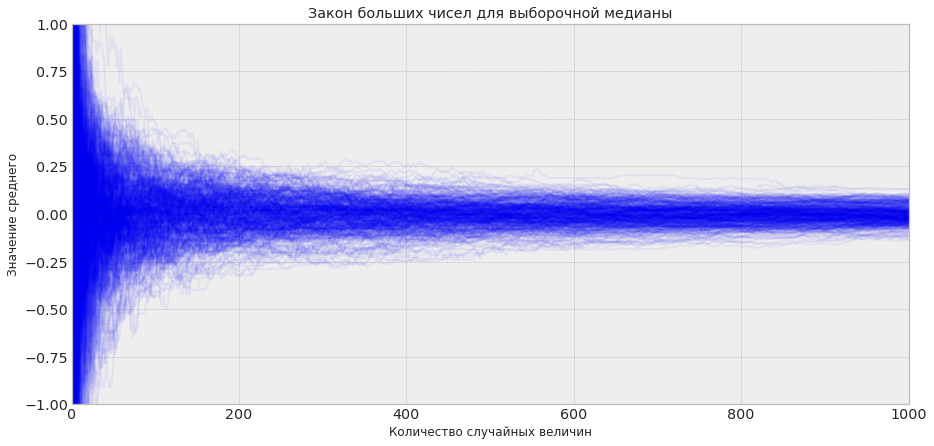

In [ ]:
plt.figure(figsize=(15, 7))

# рисуем для каждой выборки отдельно
for i in range(samples_count - 1):
    plt.plot(np.arange(size) + 1, cum_means[i], color='blue', alpha=0.05)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.title('Закон больших чисел для выборочной медианы')
plt.xlim((0, size))
plt.ylim((-1, 1))

**Вывод:**

Выборочная медиана подчиняется Закону больших чисел - такой вывод можно сделать из наличия у выборочной медианы математического ожидания и построенных графиках на сгенерированных по распределению Коши данных. На них математическое ожидание выборочной медианы выделено красным.

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах (по тем осям, по которым это имеет смысл).

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

Зададим константы:

In [ ]:
a = 0.5
size = 500
data_size = 1000
error = 0.02

Сгенерируем выборку:

In [ ]:
bernoulli_density = sps.bernoulli(p=a).rvs(size=(data_size, size))
mean_cumulative_sum = bernoulli_density.cumsum(axis=1) / (np.arange(size) + 1)
mean_difference = np.mean(np.abs(mean_cumulative_sum - a), axis=0)
min_index = np.where(mean_difference < error)[0][0]

Визуализируем сгенерированные данные в обычном масштабе:

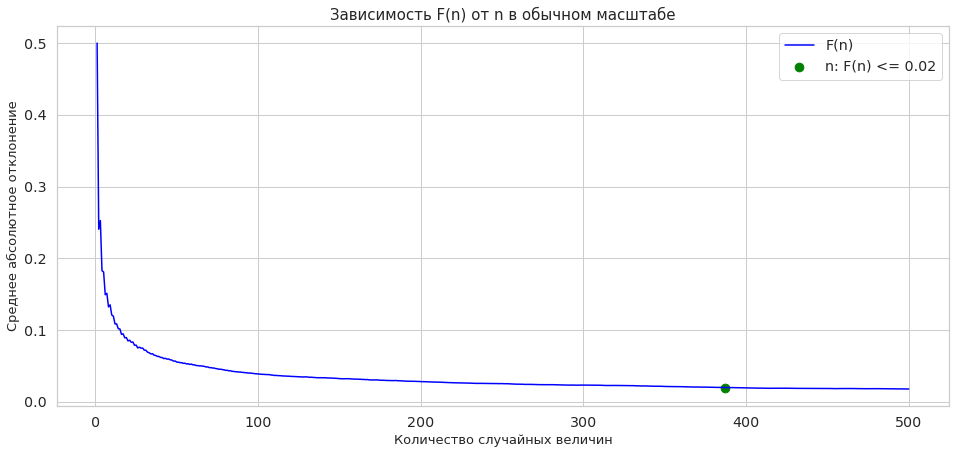

In [ ]:
plt.figure(figsize=(16, 7))

plt.plot(np.arange(size) + 1, mean_difference, color='blue', label='F(n)')
plt.scatter(min_index, mean_difference[min_index], s=300, marker='.', color='green', label='n: F(n) <= 0.02')
plt.xlabel('Количество случайных величин', fontsize=13)
plt.ylabel('Среднее абсолютное отклонение', fontsize=13)
plt.title('Зависимость F(n) от n в обычном масштабе', fontsize=15)
plt.legend()

Визуализируем сгенерированные данные в логарифмическом масштабе:

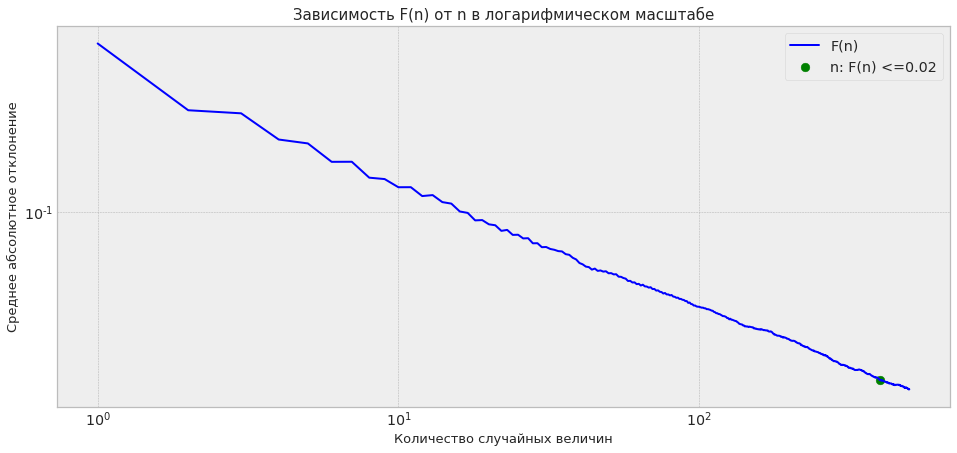

In [ ]:
plt.figure(figsize=(16, 7))

plt.plot(np.arange(size) + 1, mean_difference, color='blue', label='F(n)')
plt.scatter(min_index, mean_difference[min_index], s=300, marker='.', color='green', label='n: F(n) <=0.02')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Количество случайных величин', fontsize=13)
plt.ylabel('Среднее абсолютное отклонение', fontsize=13)
plt.title('Зависимость F(n) от n в логарифмическом масштабе', fontsize=15)
plt.legend()

**Вывод:**
Исходя из построенных графиков, мы можем заметить, что при нормальном масштабе функция F(n) ведет себя как степенная, а при логарифмическом масштабе по обоим осям - как линейная.

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

Сгенерируем выборку:

In [ ]:
bernoulli_density = sps.bernoulli(p=a).rvs(size=(data_size, size))
mean_cumulative_sum = bernoulli_density.cumsum(axis=1) / (np.arange(size) + 1)
mean_difference = np.mean(np.abs(mean_cumulative_sum - a), axis=0)
min_index = np.where(mean_difference < error)[0][0]

Сгенерируем выборку значений для разных а:

In [ ]:
min_index_list = []
a_list = []
for i in range(5, 100, 5):
    a = i / 100.0
    a_list.append(a)
    bernoulli_density = sps.bernoulli(p=a).rvs(size=(data_size, size))
    mean_cumulative_sum = bernoulli_density.cumsum(axis=1) / (np.arange(size) + 1)
    mean_difference = np.mean(np.abs(mean_cumulative_sum - a), axis=0)
    min_index = np.where(mean_difference < error)[0][0]
    min_index_list.append(min_index)

Визуализируем полученные значения n:

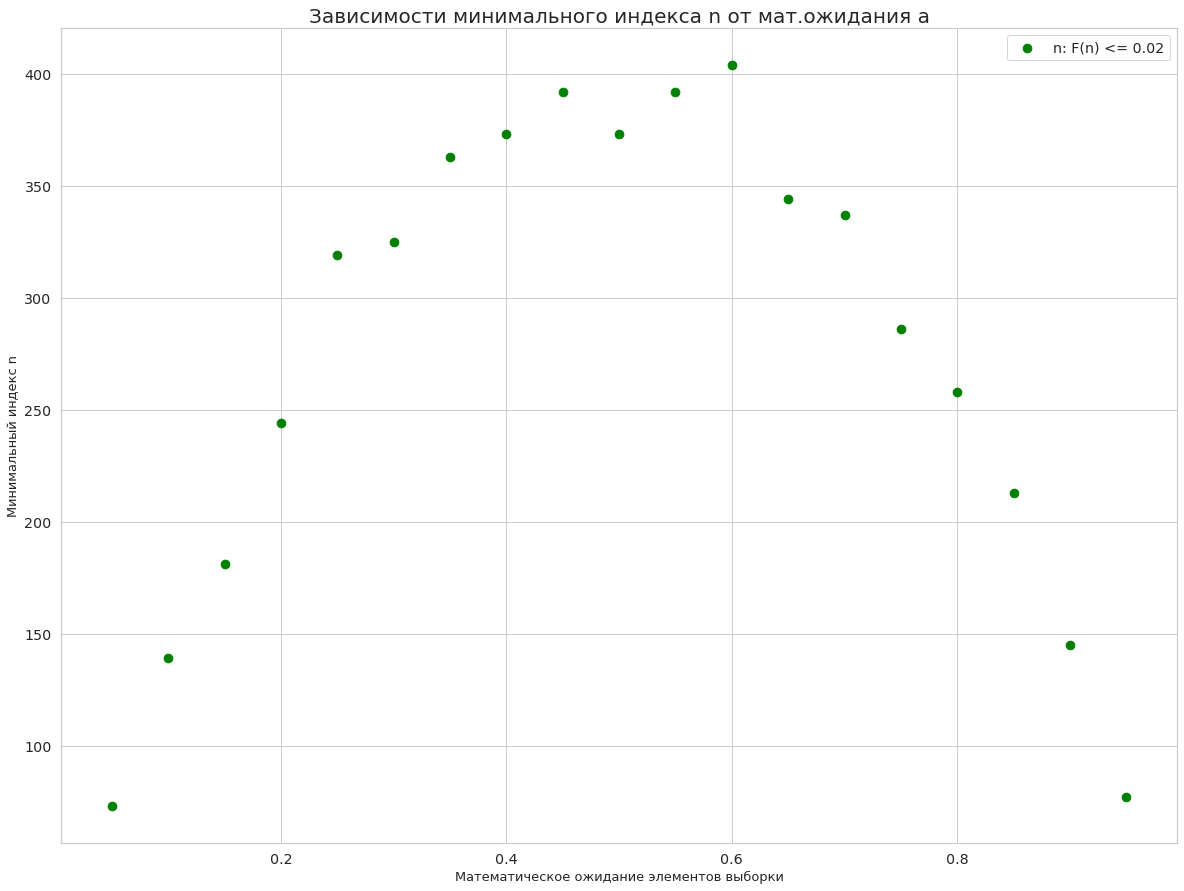

In [ ]:
plt.figure(figsize=(20, 15))

plt.scatter(a_list, min_index_list, s=300, marker='.', color='green', label='n: F(n) <= 0.02')
plt.xlabel('Математическое ожидание элементов выборки', fontsize=13)
plt.ylabel('Минимальный индекс n', fontsize=13)
plt.title('Зависимости минимального индекса n от мат.ожидания a', fontsize=20)
plt.legend()

**Выводы:**

График напоминает параболу, ветви которой направлены вниз с некоторым шумом. Предположим, что это график функции get_index(a).  

*   get_index(a) достигает максимум в центре (это можно объяснить тем, что середина - наименее предсказуемое распределение, а значит индекс n - возвращаемый get_index(a) параметр - будет максимальным)

*   get_index(a) практически симметрична относительно центра (это можно объяснить тем, что итоговое распределение симметрично относительно центра отрезка, а значит и график будет симметричен относительно центра этого отрезка (х=0.5))

